In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
from sqlalchemy import desc 
date= session.query(measurement.date).order_by(desc(measurement.date)).first()
    
# d = [result[0] for result in date]
# x=d[0]
# x
date

('2017-08-23',)

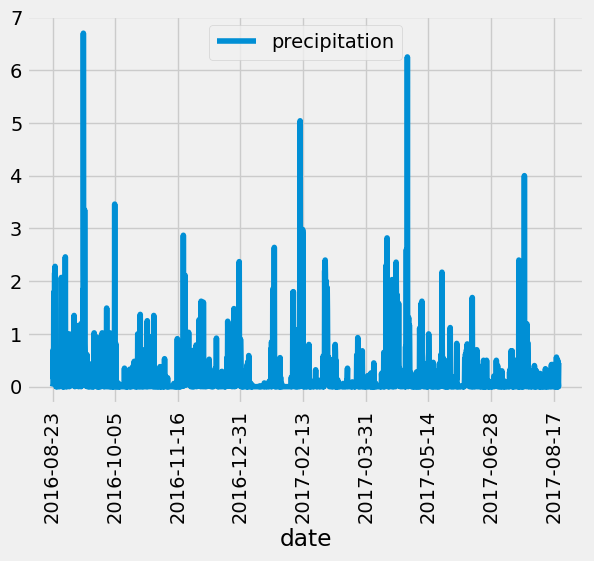

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lasty = dt.date(2017, 8, 23)-dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
dp = session.query(measurement.date, measurement.prcp).filter(measurement.date>=lasty).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
rst= pd.DataFrame(dp, columns =["date", "precipitation"])
rst1=rst.dropna()

# Sort the dataframe by date
rt=rst1.sort_values('date')

rt.set_index(rt["date"], inplace = True)
# Use Pandas Plotting with Matplotlib to plot the data

rt.plot(rot=90)
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
rt.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
nbr_s=session.query(func.count(station.station)).all()
nbr_s

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
st = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
st

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
st1= session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()
s=st1[0]
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == s).all()




[(54.0, 85.0, 71.66378066378067)]

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


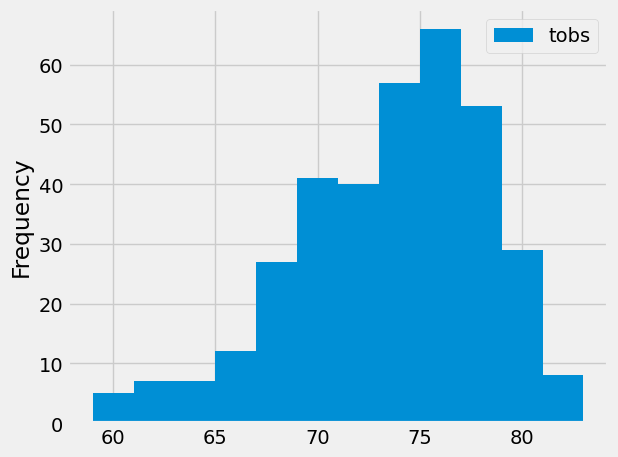

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tp = session.query(measurement.tobs).filter(measurement.station == s).\
    filter(measurement.date >= lasty).all()
tpd= pd.DataFrame(tp, columns = ["tobs"])
tpd.plot.hist(bins = 12)
plt.tight_layout()
tpd

# Close Session

In [19]:
# Close Session
session.close()